#### EMOTION DETECTION DATASET

## 1.0 DATA SOURCES
The Sentiment Analysis dataset was sourced from Kaggle, a leading platform for data science collaboration and competitions. It provides access to diverse datasets for exploring real-world problems.

This dataset falls under the Natural Language Processing (NLP) and Social Media domains. It's typically provided in CSV format and contains user-generated text (e.g., tweets), annotated with sentiment labels such as:
- Positive, Negative, Neutral

You can access the dataset via the following link: [Sentiment Analysis Dataset on Kaggle](https://www.kaggle.com/datasets/kushagra3204/sentiment-and-emotion-analysis-dataset/data)

## 1.1 TOOLS AND ENVIRONMENT
Python Notebook (Jupyter Notebook)

## 1.2 MODELLING APPROACH
- Model Built with Logistic Regression (LR)

- Model Built with Random Forest Classifier (RF)

- Model Built with Decision Tree Classifier (DT)

- Model Built with Extreme Gradient Boosting (XGB)

- Model Built with Long Short-Term Memory Network (LSTM)

- Model Built with Gated Recurrent Unit Network (GRU)

- Model Built with Convolutional Neural Network (CNN)

In [7]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [9]:

# Standard libraries
import os
import random
import shutil
import warnings
import import_ipynb
import sys

# Data processing libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import scipy.stats as stats
import pyforest
from wordcloud import WordCloud
from textblob import TextBlob

# Terminal formatting
from colorama import Fore, Style
from termcolor import colored

# Scikit-learn utilities
from sklearn.model_selection import (
    train_test_split, RepeatedStratifiedKFold, StratifiedKFold, KFold,
    cross_val_predict, cross_val_score, cross_validate, GridSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer,
    MinMaxScaler, LabelEncoder, RobustScaler, label_binarize
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, r2_score,
    mean_absolute_error, mean_squared_error, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc,
    make_scorer, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
)
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVR, SVC
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor,
    ExtraTreesRegressor, AdaBoostClassifier
)
from sklearn.feature_selection import (
    SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer

# Imbalanced data handling
from imblearn.over_sampling import SMOTE

# Optimization and tuning
from skopt import BayesSearchCV
from keras_tuner import BayesianOptimization
from keras_tuner.tuners import BayesianOptimization as KerasBayesianOptimization

# XGBoost
from xgboost import XGBClassifier, XGBRegressor, plot_importance

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    LSTM, GRU, Conv1D, GlobalMaxPooling1D, Embedding, Dense, Dropout
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Configurations
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 200)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Initialize plotly and cufflinks
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [11]:
import sys
sys.path.append('../functions')

from model_function import *


In [12]:
import importlib
import model_function  # first, import the module
importlib.reload(model_function)  # then reload it

<module 'model_function' from '/Users/madeniji/Documents/Pycharm_Dev/msc_sentemotion_analysis/model_src_code/run_scripts/../functions/model_function.py'>

In [13]:
data_path = '../dataset/combined_sentiment_data.csv'

In [14]:
df_sent = pd.read_csv(data_path)

In [15]:
print(len(df_sent))
print(len(df_sent.columns))

3309
2


In [16]:
#Check for top 5 datas using .head()
df_sent.head()

sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive

In [17]:
#Check for last 5 datas using .tail()
df_sent.sample(5)

sentence sentiment
52    A usable keyboard actually turns a PDA into a ...  positive
680                And none of the tones is acceptable.  negative
1376  This was such an awesome movie that i bought i...  positive
1237  But what really made it unwatchable was the di...  negative
203   The best electronics of the available FM Trans...  positive

In [18]:
df_sent.describe()

sentence sentiment
count      3309      3309
unique     3289         2
top      #NAME?  positive
freq          4      1679

In [19]:
check_missing_values(df_sent)

Missing_Number  Missing_Percent
sentence            0.000            0.000
sentiment           0.000            0.000

In [20]:
df_sent = df_sent.dropna(subset=['sentence', 'sentiment'])
df_sent = df_sent[~df_sent['sentence'].str.strip().str.lower().eq('#name?')]
df_st_clean = df_sent.copy()

In [21]:
inspect_columns(df_st_clean, cols=['sentence', 'sentiment'])

Column Name  Percentage Nulls (%)  Number of Nulls  Number of Unique  \
0    sentence                 0.000                0              3288   
1   sentiment                 0.000                0                 2   

                                        Value Counts  
0  {'This is a great deal.': 2, 'Definitely worth...  
1               {'positive': 1677, 'negative': 1628}

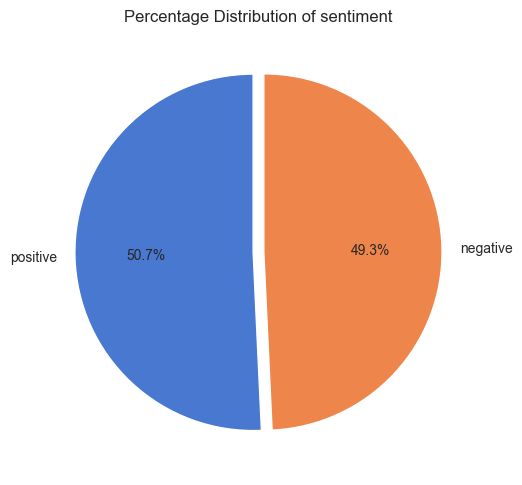

sentiment
positive     1677
negative     1628
Name: count, dtype: int64


In [22]:
plot_categorical_distributions(columns_categorical=['sentiment'], data=df_st_clean)

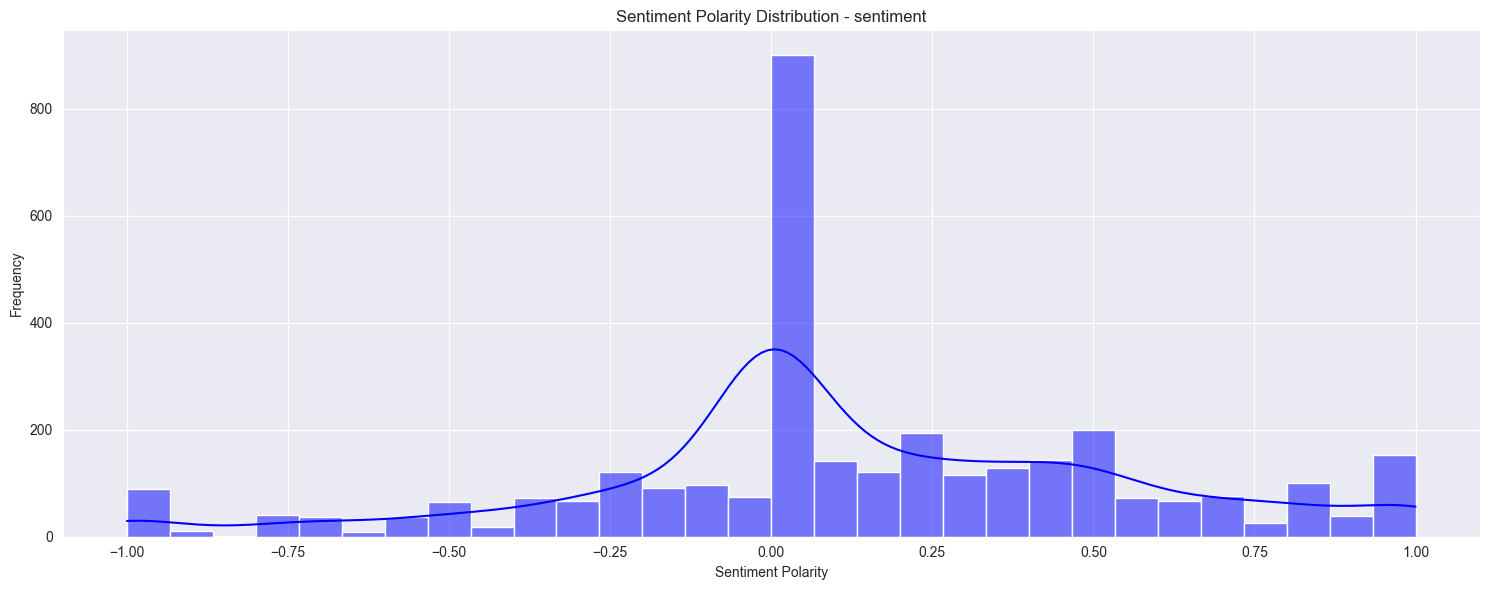

In [24]:
plot_sentiment_distribution(data=df_st_clean, text_column='sentence',df_name='sentiment')

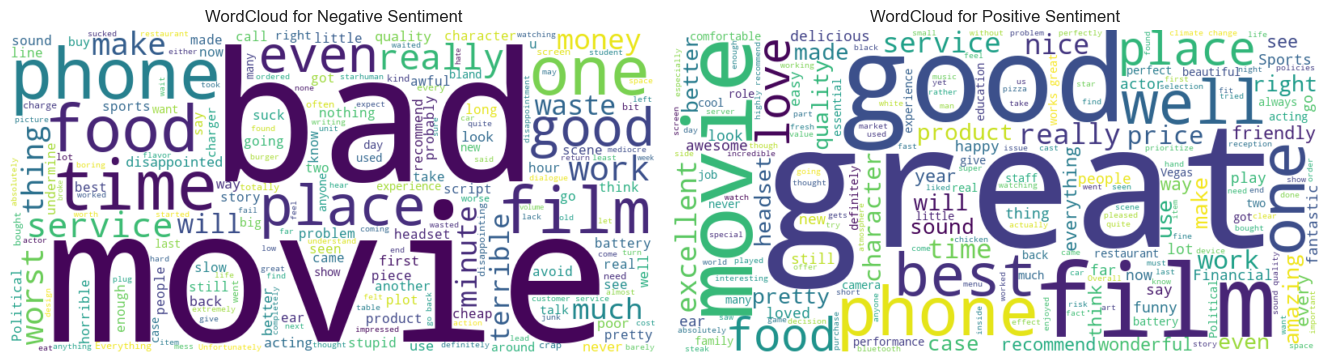

In [25]:
plot_wordcloud(df_st_clean, 'sentiment', 'sentence')

In [17]:
vectorizer_path = "../save_sent_models/ml_sent_vectorizer.pkl"

In [18]:
opt_sent_summary_list = []
opt_sent_summary_list.clear()


=== logistic_regression ===
Best Params: OrderedDict([('C', 22.364202820542708)])

Comparison of Metrics Between Logistic Regression Models:


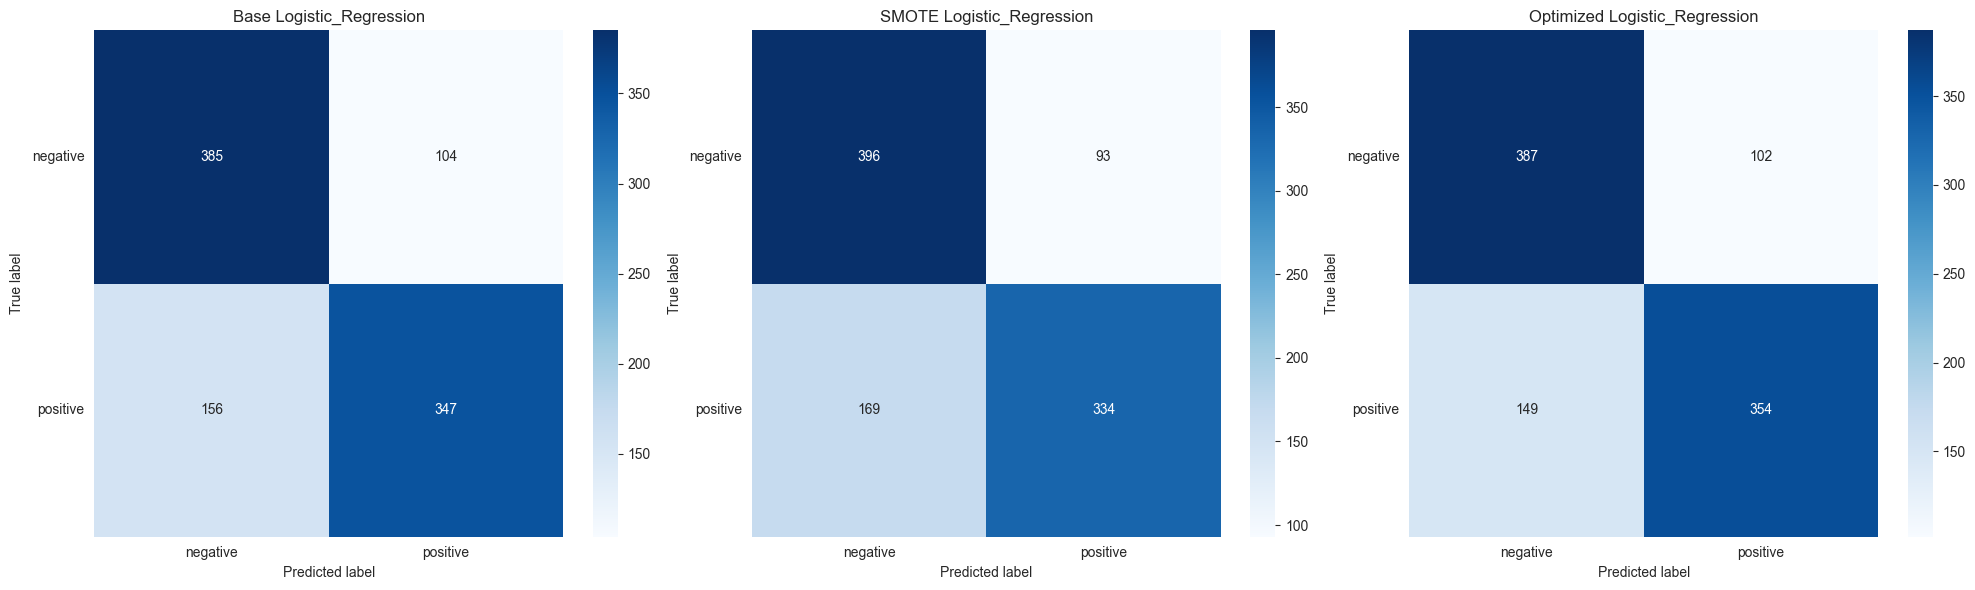

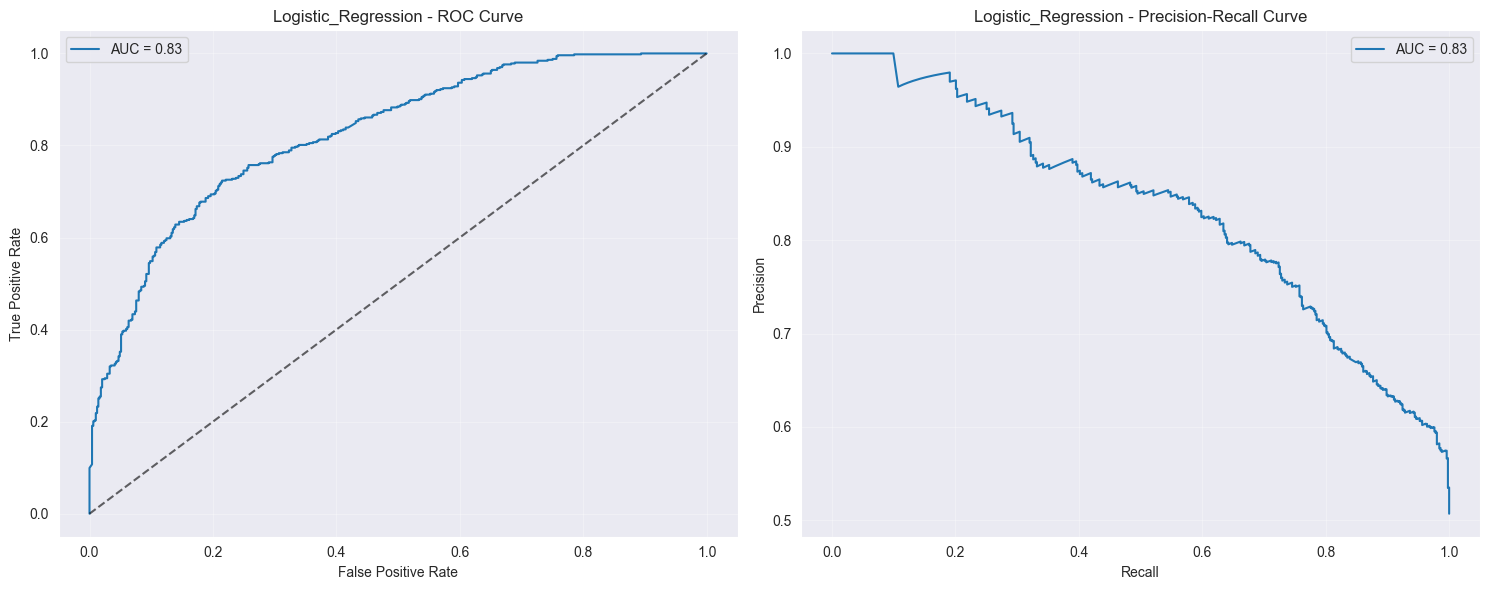

In [19]:
# === RUN END-TO-END ===
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "logistic_regression",
                                              vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "logistic_regression", best_model, opt_sent_summary_list)

# Display summary
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Logistic Regression Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

# Plot visualizations
plot_confusion_matrices(preds, "Logistic_Regression")
plot_training_metrics(preds, "Logistic_Regression")


=== naive_bayes ===
Best Params: OrderedDict([('alpha', 0.4729080547055919)])

Comparison of Metrics Between Naive Bayes Models:


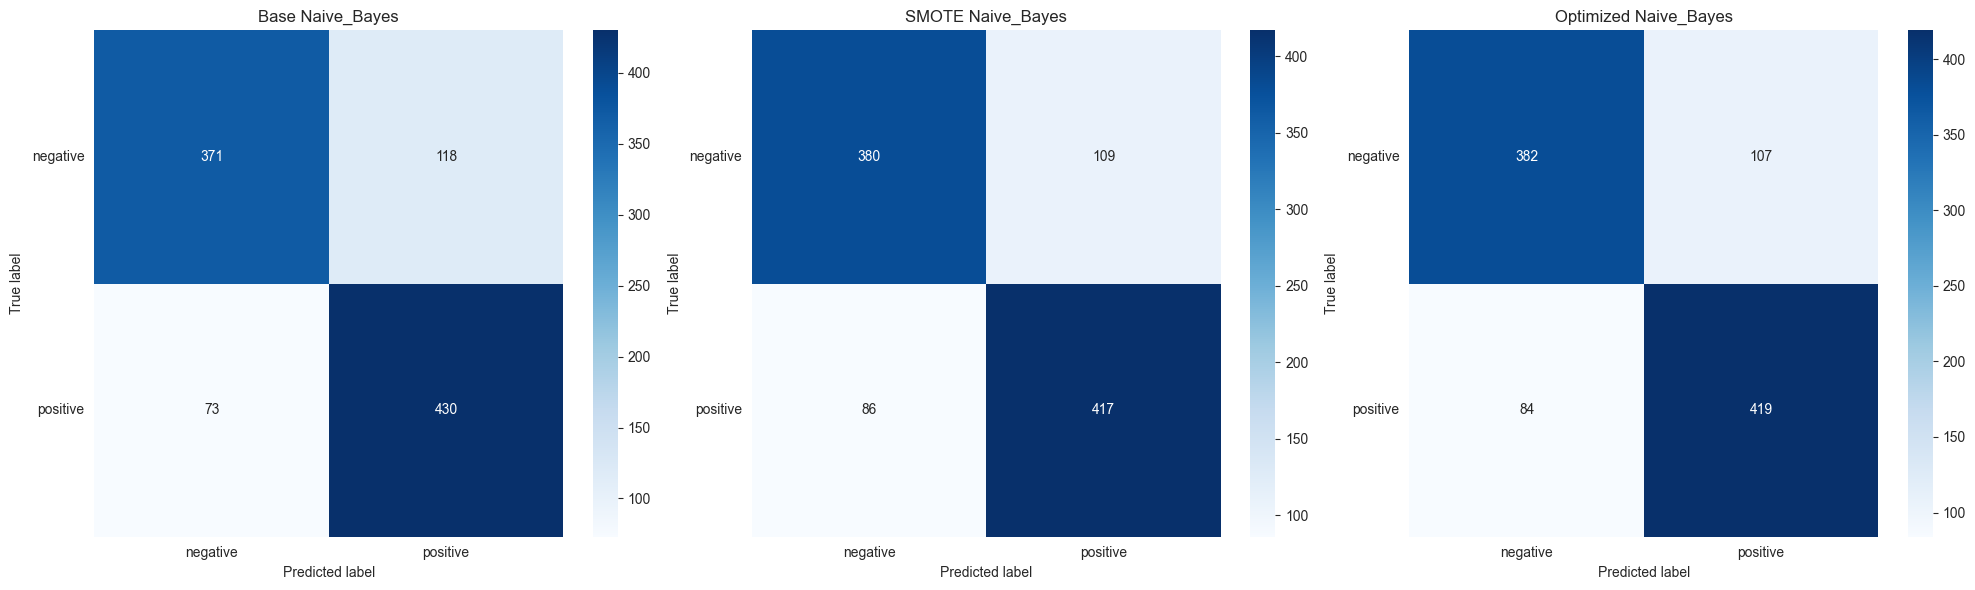

In [20]:
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "naive_bayes", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "naive_bayes", best_model, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Naive Bayes Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "Naive_Bayes")


=== random_forest ===
Best Params: OrderedDict([('max_depth', 13), ('n_estimators', 76)])

Comparison of Metrics Between Random Forest Models:


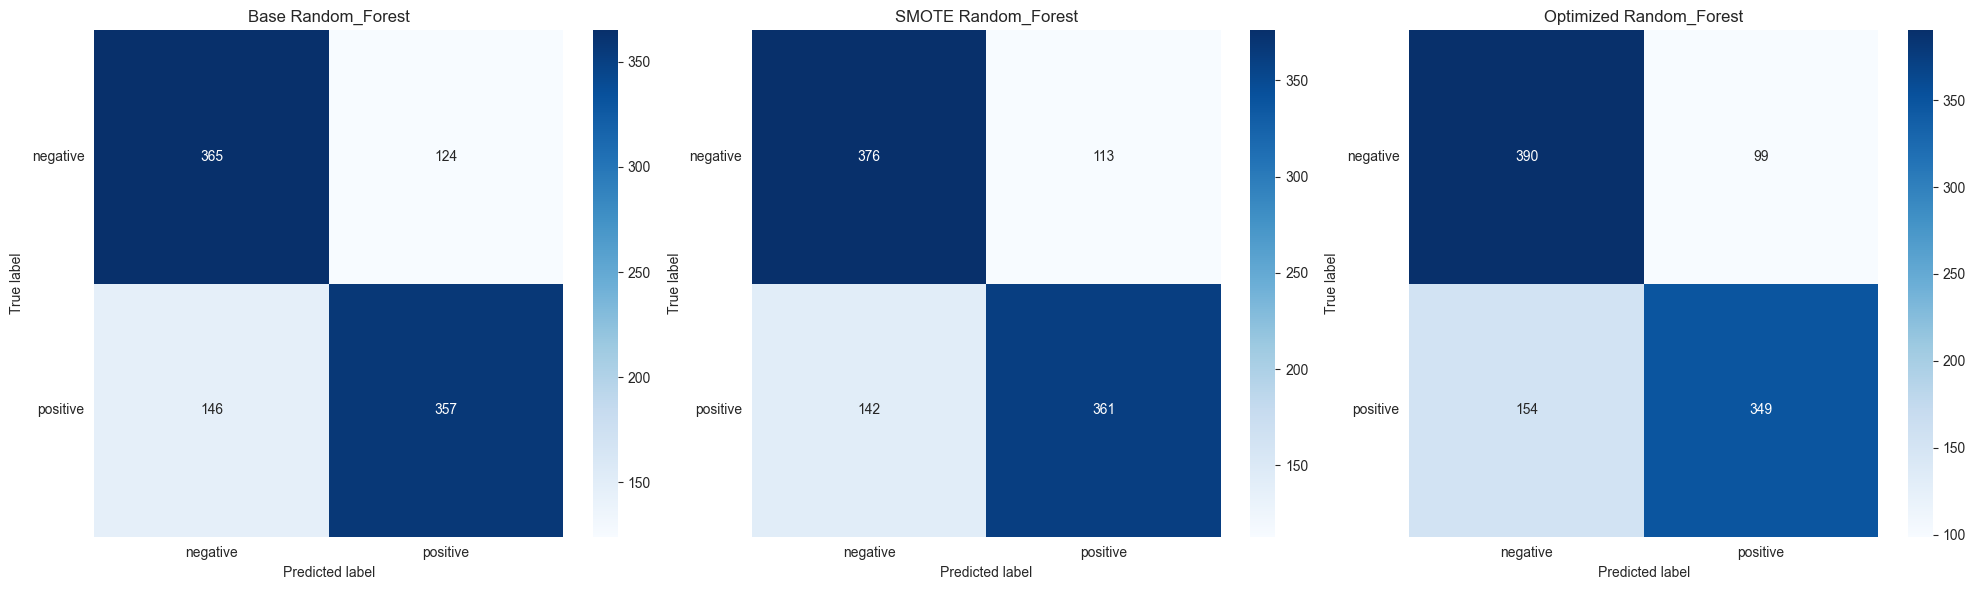

In [21]:
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "random_forest", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "random_forest", best_model, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between Random Forest Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "Random_Forest")


=== xgboost ===


/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/madeniji/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [13:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

Best Params: OrderedDict([('learning_rate', 0.15171809566296443), ('max_depth', 5), ('n_estimators', 129)])

Comparison of Metrics Between XGBoost Models:


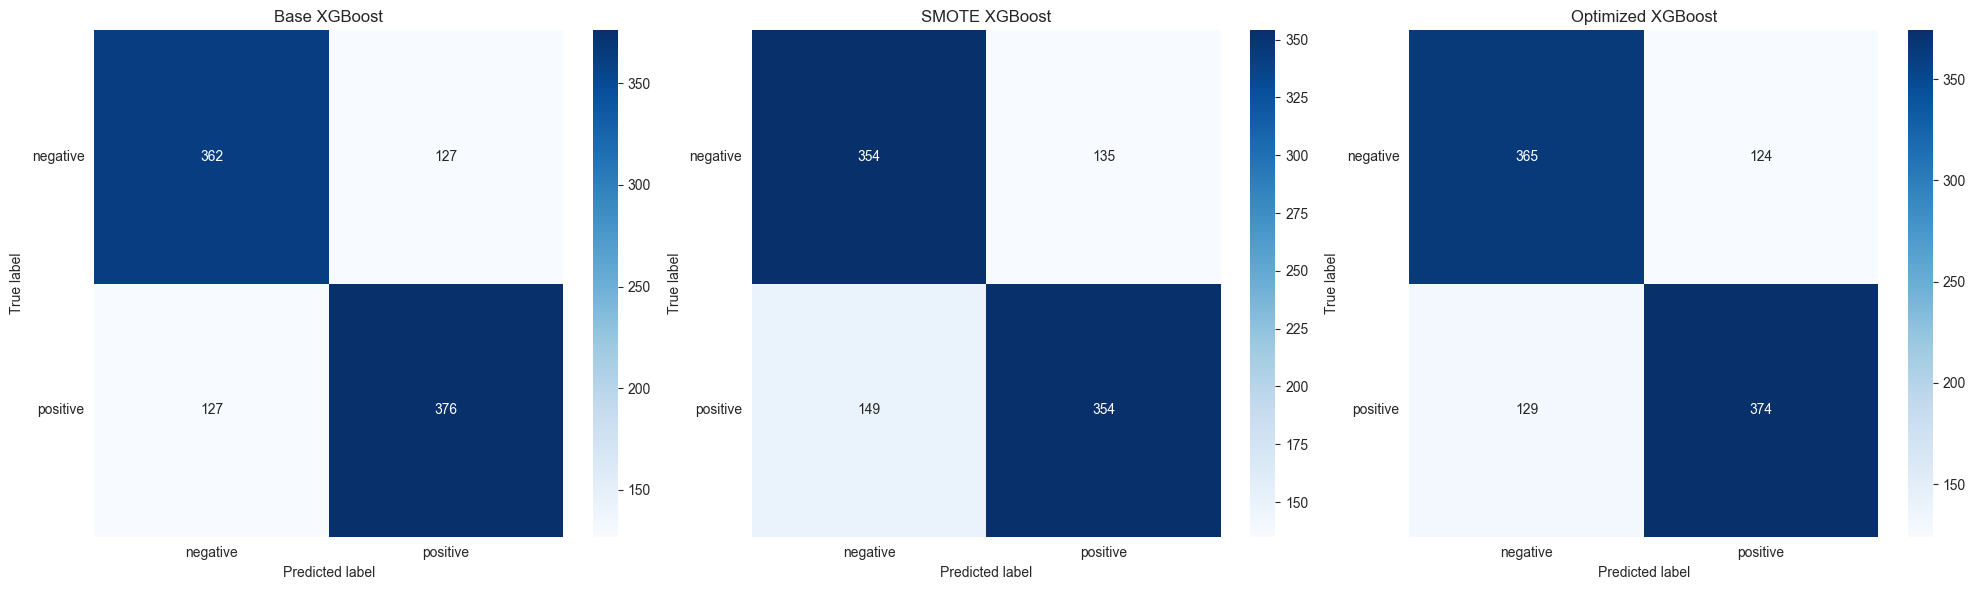

In [22]:
results, preds, best_model = run_ml_workflow(df_st_clean, "sentence",
                                             "sentiment", "xgboost", vectorizer_path)
# Append the optimized summary
append_optimized_metrics(results, "xgboost", best_model, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between XGBoost Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_confusion_matrices(preds, "XGBoost")

## DEEP LEARNING MODEL

In [23]:
tokenizer_path = "../save_sent_models/dl_sent_tokenizer.pkl"

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step

Comparison of Metrics Between LSTM Models:


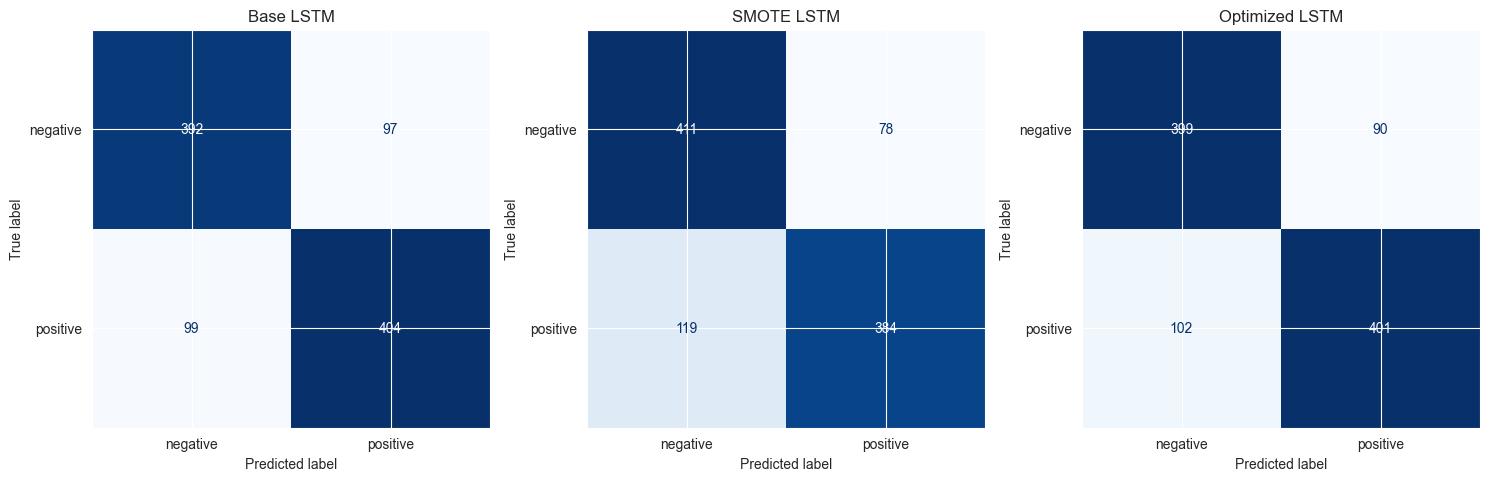

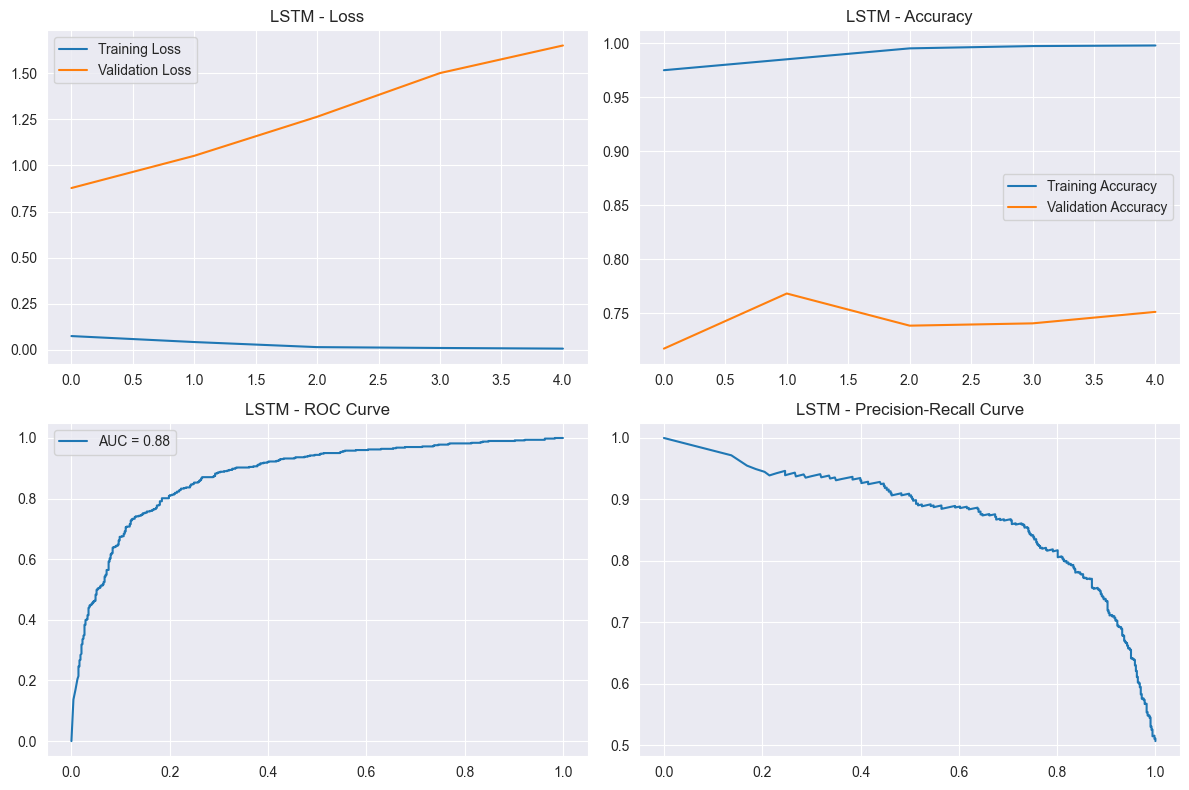

In [24]:
results, preds, opt_history = run_dl_workflow(df_st_clean, "sentence",
                                              "sentiment", "LSTM", tokenizer_path
                                              )
# Append the optimized summary
append_optimized_metrics(results, "LSTM", opt_history, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between LSTM Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "LSTM")
plot_dl_training_metrics(opt_history, preds, "LSTM")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Comparison of Metrics Between GRU Models:


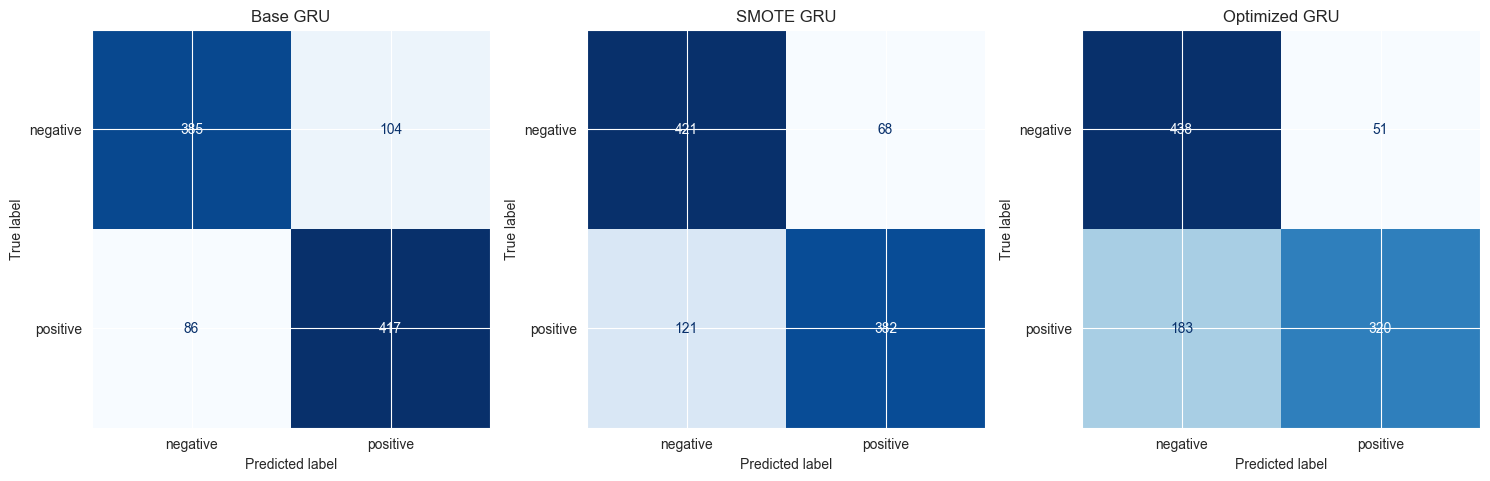

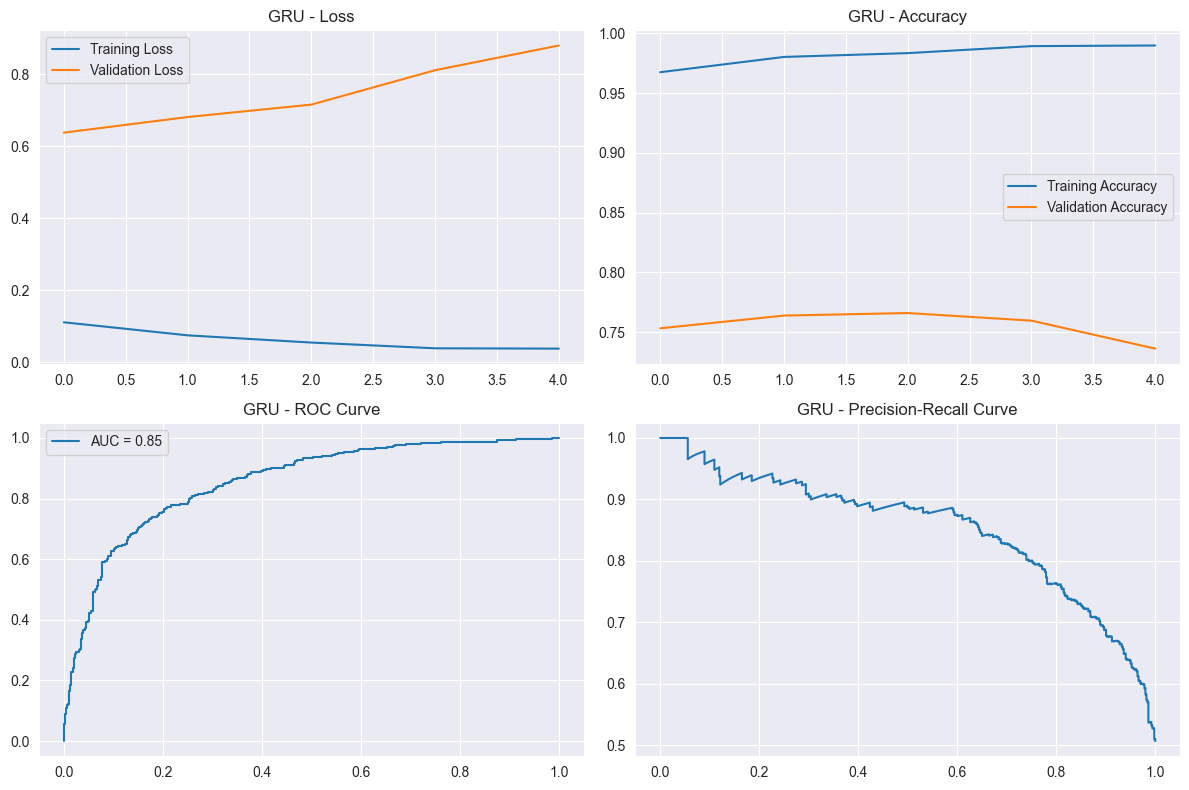

In [25]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_st_clean, "sentence",
                                              "sentiment", "GRU", tokenizer_path)
# Append the optimized summary
append_optimized_metrics(results, "GRU", opt_history, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between GRU Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "GRU")
plot_dl_training_metrics(opt_history, preds, "GRU")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Comparison of Metrics Between CNN Models:


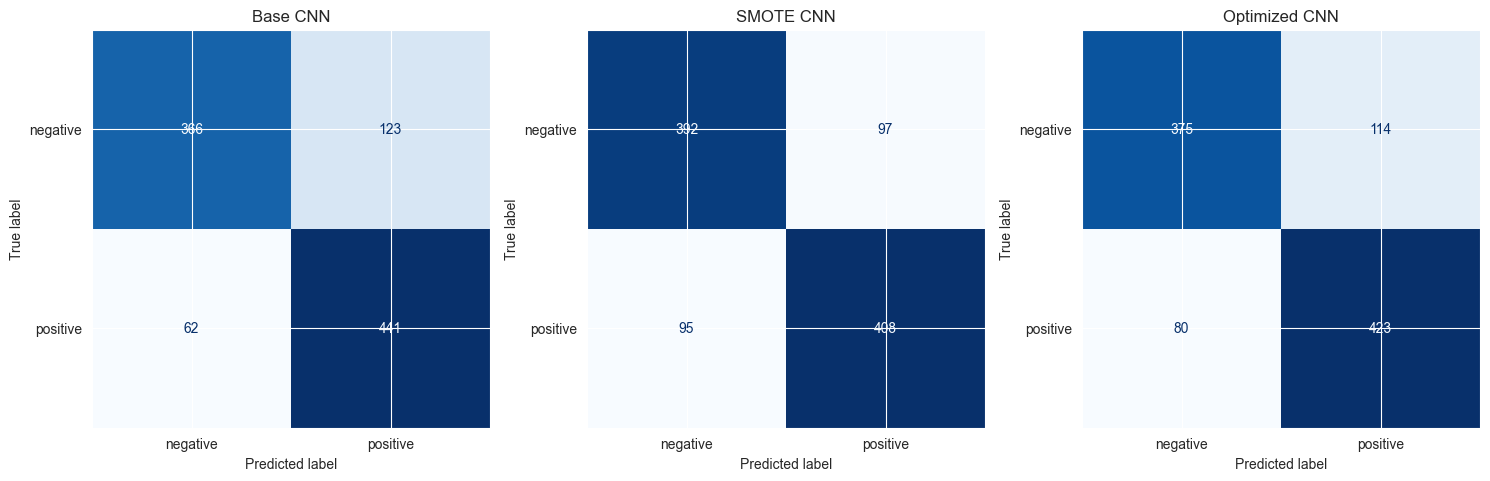

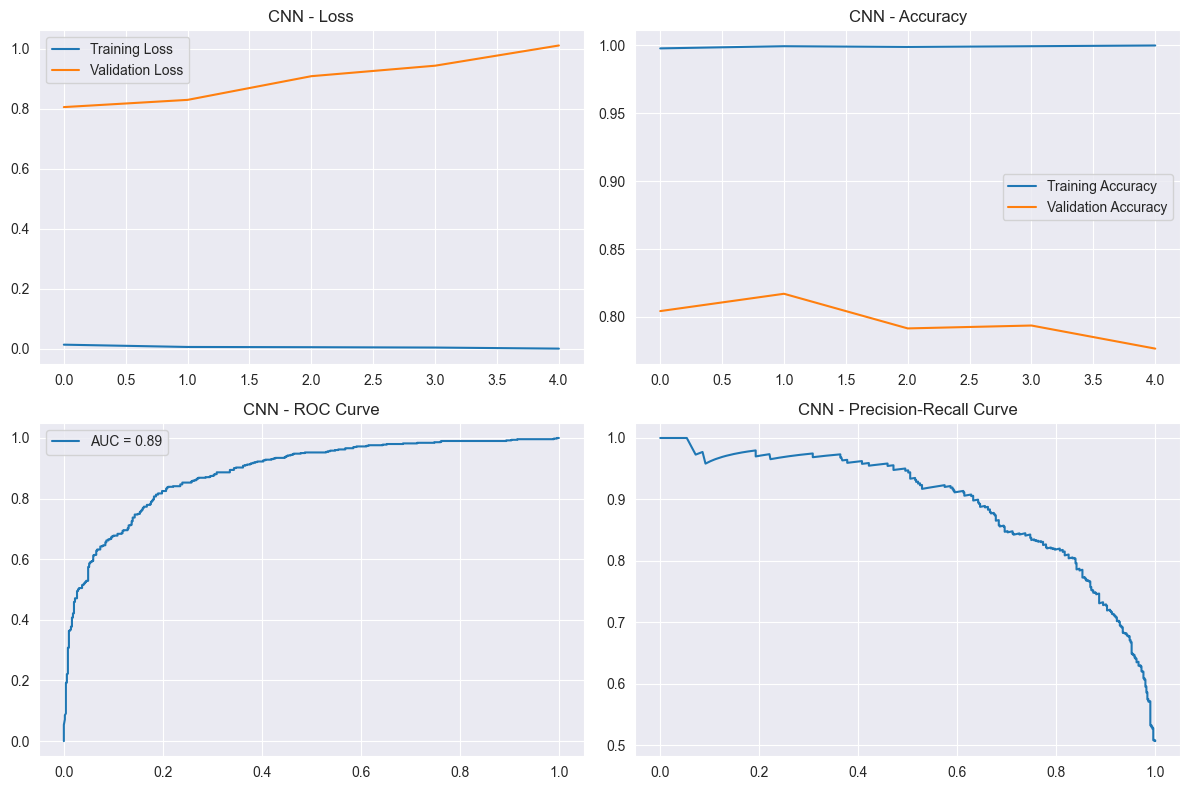

In [26]:
## DEEP LEARNING MODEL
results, preds, opt_history = run_dl_workflow(df_st_clean, "sentence",
                                              "sentiment", "CNN", tokenizer_path
                                              )
# Append the optimized summary
append_optimized_metrics(results, "CNN", opt_history, opt_sent_summary_list)

# Display the table
summary_df = pd.DataFrame(results).T
print(f"\n\033[1mComparison of Metrics Between CNN Models:\033[0m")
display(summary_df.style.highlight_max(axis=0, color='lightblue'))

plot_dl_confusion_matrices(preds, "CNN")
plot_dl_training_metrics(opt_history, preds, "CNN")

In [27]:
import joblib
import pandas as pd

opt_summary_df = pd.DataFrame(opt_sent_summary_list)
# display(opt_summary_df)

# # Sort by F1-Score in descending order
ranked_df = opt_summary_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)
ranked_df["Rank"] = ranked_df.index + 1           # rank column
df_rank = ranked_df.drop(columns=['Rank'], errors='ignore')

df_rank = df_rank.copy()

In [28]:
import joblib
import os

# Create directory if it doesn't exist
os.makedirs("../save_sent_models", exist_ok=True)

# Loop through all ranked models and save with position
for idx, row in df_rank.iterrows():
    model = row["Object"]
    model_name = row["Model"].lower().replace(" ", "_")  # sanitize name
    filename = f"sent_{idx+1}_{model_name}_model.pkl"
    filepath = os.path.join("../save_sent_models", filename)

    joblib.dump(model, filepath)
    print(f"Saved: {filename}")


Saved: sent_1_naive_bayes_model.pkl
Saved: sent_2_lstm_model.pkl
Saved: sent_3_cnn_model.pkl
Saved: sent_4_gru_model.pkl
Saved: sent_5_logistic_regression_model.pkl
Saved: sent_6_xgboost_model.pkl
Saved: sent_7_random_forest_model.pkl


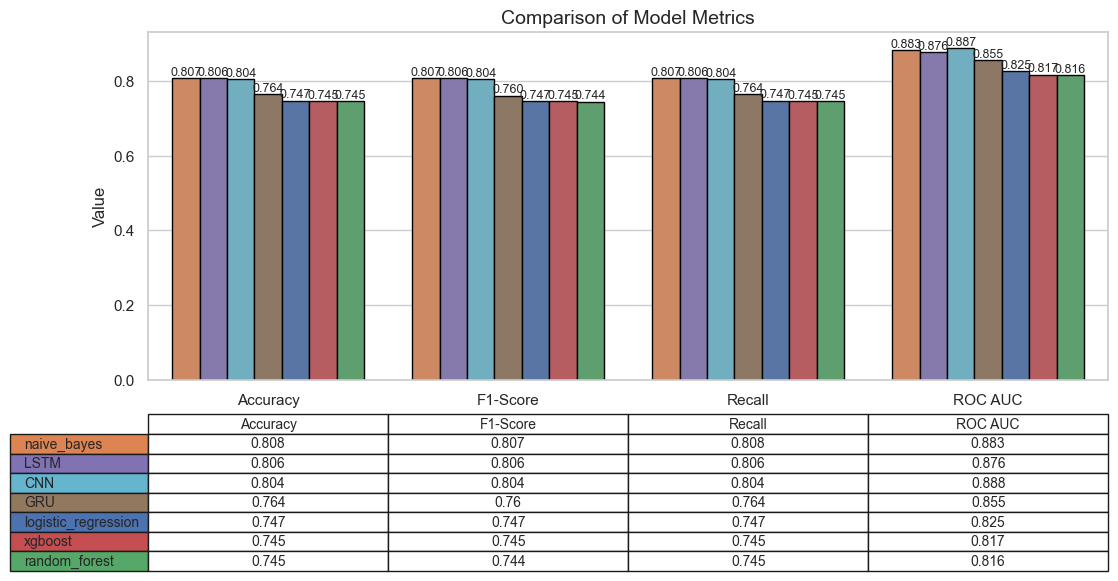

In [29]:
plot_model_comparison(df_rank)